Abrir o dataset e importar as bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
og_data = pd.read_csv(r'./arqs/League of Legends Champion Stats 12.9.csv', sep=';')

Checa as dimensões e os nomes das colunas

In [4]:
print(f'Dimensões: {og_data.shape}')
print(f'Nome das colunas {og_data.columns.values.tolist()}')

Dimensões: (243, 11)
Nome das colunas ['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %', 'Pick %', 'Ban %', 'KDA']


Checa todas as classes de campeões no dataset

In [5]:
classes = og_data.Class.unique().tolist()
print(f'As classes do dataset são: {classes}')

As classes do dataset são: ['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank', 'Support']


Checa todas as roles de campeões no dataset

In [6]:
roles = og_data.Role.unique().tolist()
print(f'As roles do dataset são: {roles}')

As roles do dataset são: ['TOP', 'MID', 'SUPPORT', 'JUNGLE', 'ADC']


Checa se existem colunas nulas

In [7]:
og_data.isnull().sum()

Name      0
Class     0
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

Remove o % dos valores da coluna 'Win %'

In [8]:
og_data['Win %'] = og_data['Win %'].str[:-1]
og_data['Role %'] = og_data['Role %'].str[:-1]
og_data['Pick %'] = og_data['Pick %'].str[:-1]
og_data['Ban %'] = og_data['Ban %'].str[:-1]
og_data.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,77.17,-5.29,49.54,92.59,7.61,6.47,1.84
1,Ahri,Mage,MID,God,80.34,-7.49,50.38,94.77,10.83,13.10,2.41
2,Akali,Assassin,MID,S,62.64,-0.47,49.61,64.32,6.53,15.19,2.26
3,Akali,Assassin,TOP,A,49.62,-1.60,48.14,34.81,3.32,15.19,1.98
4,Akshan,Marksman,MID,A,52.54,1.41,50.97,61.05,3.64,10.18,2.13


Troca o tipo das colunas para float

In [9]:
og_data[['Win %', 'Role %', 'Pick %', 'Ban %']] = og_data[['Win %', 'Role %', 'Pick %', 'Ban %']].apply(pd.to_numeric)

Checa se os tipos da classe foram trocados

In [10]:
og_data.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object

Remove campeoes com mais de uma entrada

In [41]:
og_data = og_data.drop_duplicates(subset='Name', keep='first')

Checa se nao existem mais dados repetidos

In [45]:
for i in og_data['Name'].duplicated():
    if i:
        print('Has duplicated data')
else:
    print('Its clean!')
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Conta quantas vezes cada classe aparece no dataset

In [11]:
contagem_de_classes = og_data.groupby('Class').Name.count().reset_index()
contagem_de_classes

,Class,Name
0,Assassin,26
1,Fighter,72
2,Mage,63
3,Marksman,32
4,Support,20
5,Tank,30


Conta quantas vezes cada role aparece no dataset

In [12]:
contagem_de_roles = og_data.groupby('Role').Name.count().reset_index()
contagem_de_roles

,Role,Name
0,ADC,28
1,JUNGLE,47
2,MID,61
3,SUPPORT,45
4,TOP,62


Plota um gráfico pizza com as porcentagens de cada role

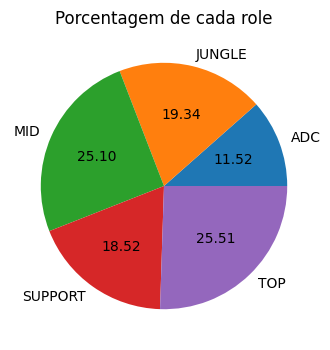

In [13]:
plt.figure(figsize=(15,4))
plt.pie(contagem_de_roles.Name, labels=contagem_de_roles.Role, autopct='%.2f')
plt.title('Porcentagem de cada role')
plt.show()

Plota um gráfico pizza com as porcentagens de cada classe

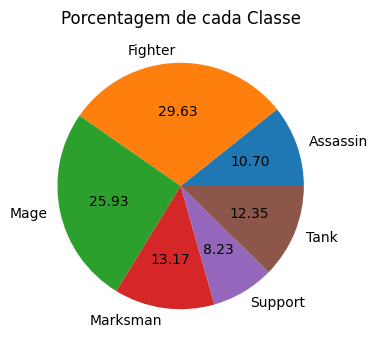

In [14]:
plt.figure(figsize=(15,4))
plt.pie(x=contagem_de_classes.Name, labels=contagem_de_classes.Class, autopct='%.2f')
plt.title('Porcentagem de cada Classe')
plt.show()

Cria outros df para tratamento por role

In [15]:
top_df = og_data.loc[og_data['Role'] == 'TOP'].reset_index()
jg_df = og_data.loc[og_data['Role'] == 'JUNGLE'].reset_index()
mid_df = og_data.loc[og_data['Role'] == 'MID'].reset_index()
adc_df = og_data.loc[og_data['Role'] == 'ADC'].reset_index()
sup_df = og_data.loc[og_data['Role'] == 'SUPPORT'].reset_index()

Cria um loop para visualizacao de campeões mais pickados por Role.

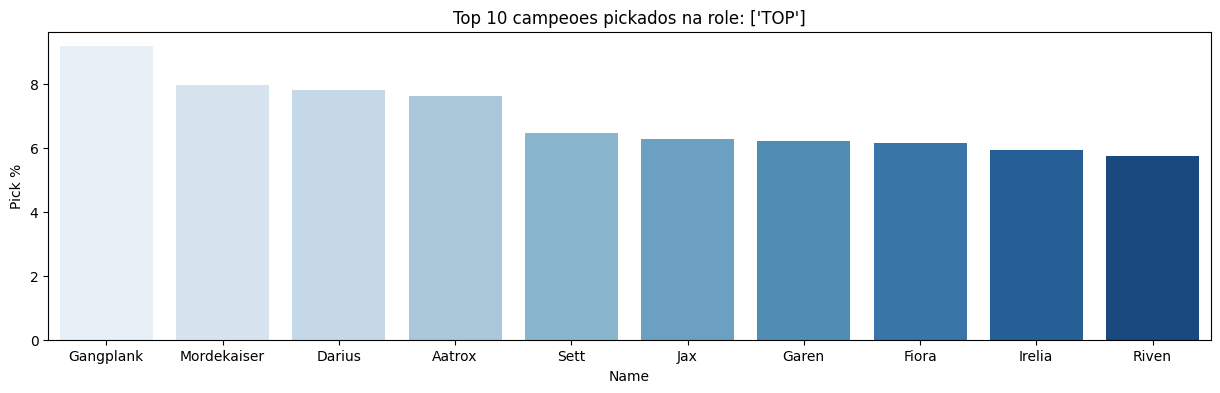

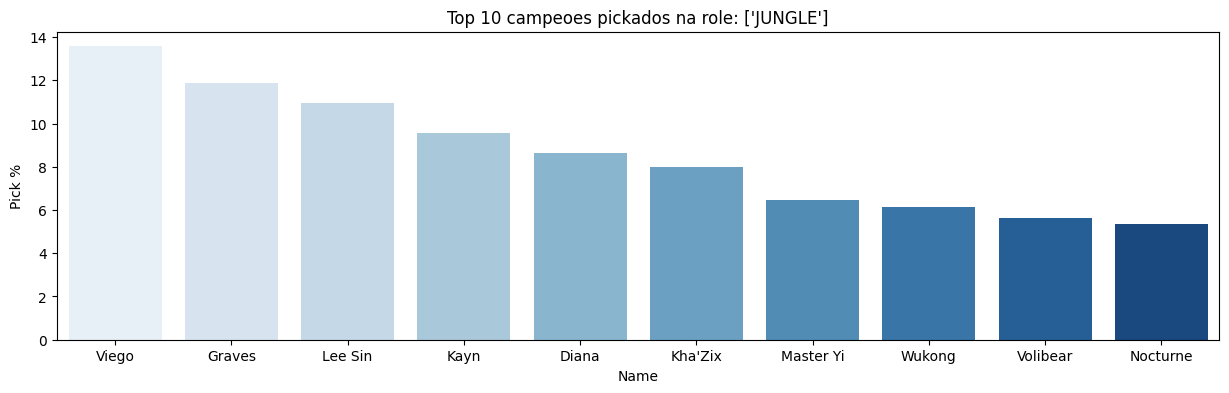

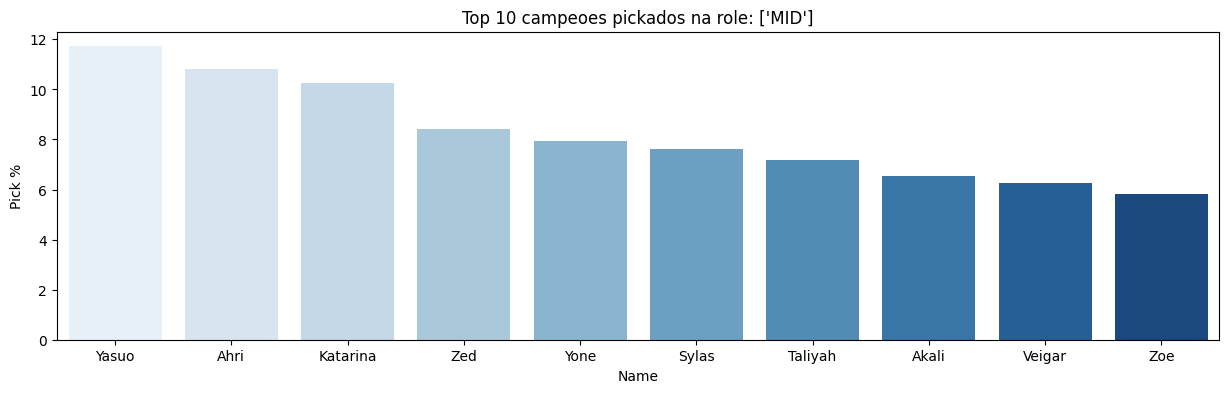

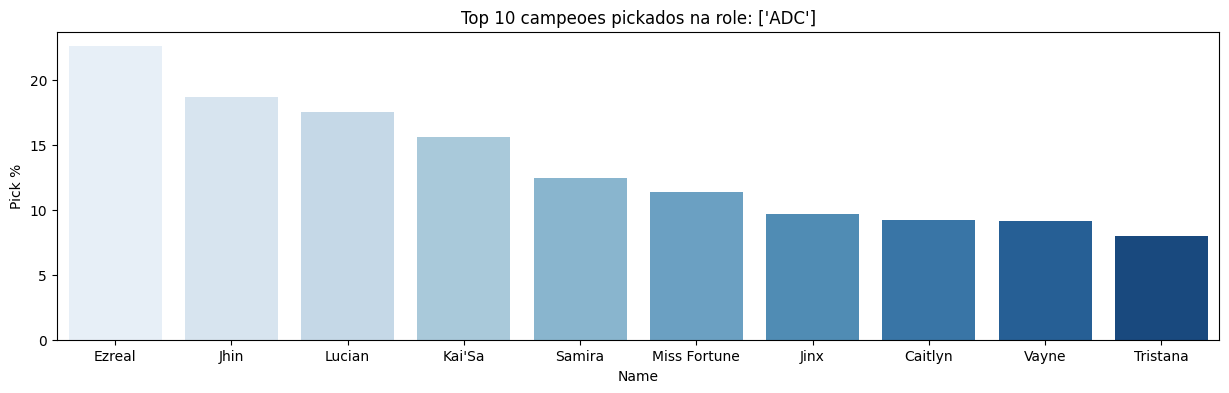

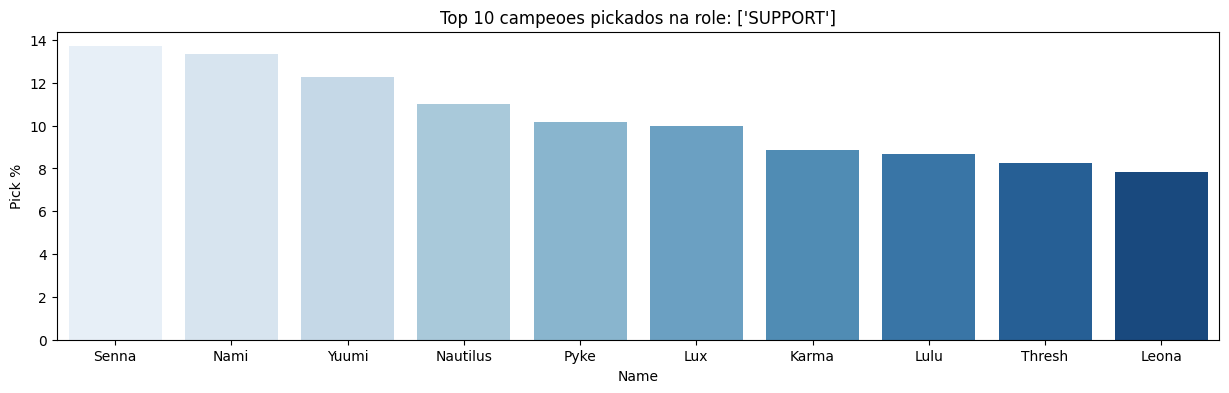

In [16]:
lista_de_roles = [top_df,jg_df ,mid_df,adc_df,sup_df]

for df in lista_de_roles:
    df = df.sort_values(by=['Pick %'], ascending=False).reset_index()
    plt.figure(figsize=(15,4))
    sns.barplot(x='Name', y='Pick %', data=df[:10], palette='Blues')
    plt.title(f'Top 10 campeoes pickados na role: {df.Role.unique()}')
    plt.show()

Visualizacao de pickrate por role

<Figure size 1500x400 with 0 Axes>

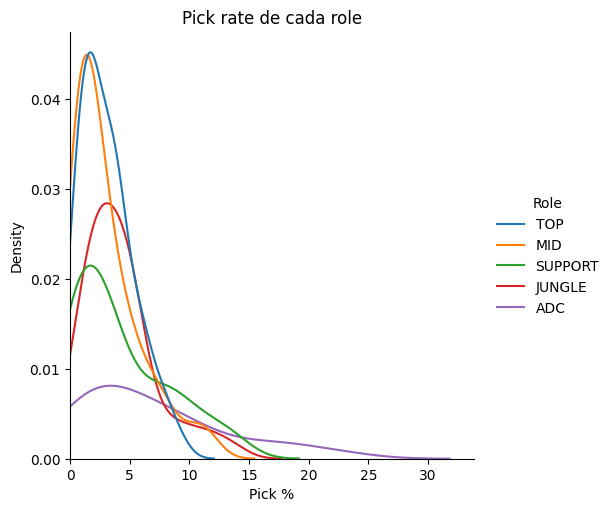

In [17]:
plt.figure(figsize=(15,4))
sns.displot(x='Pick %', data=og_data, hue='Role', kind='kde')
plt.xlim(0)
plt.title('Pick rate de cada role')
plt.show()

Visualizacao do relacionamento entre KDA e WIn Rate %

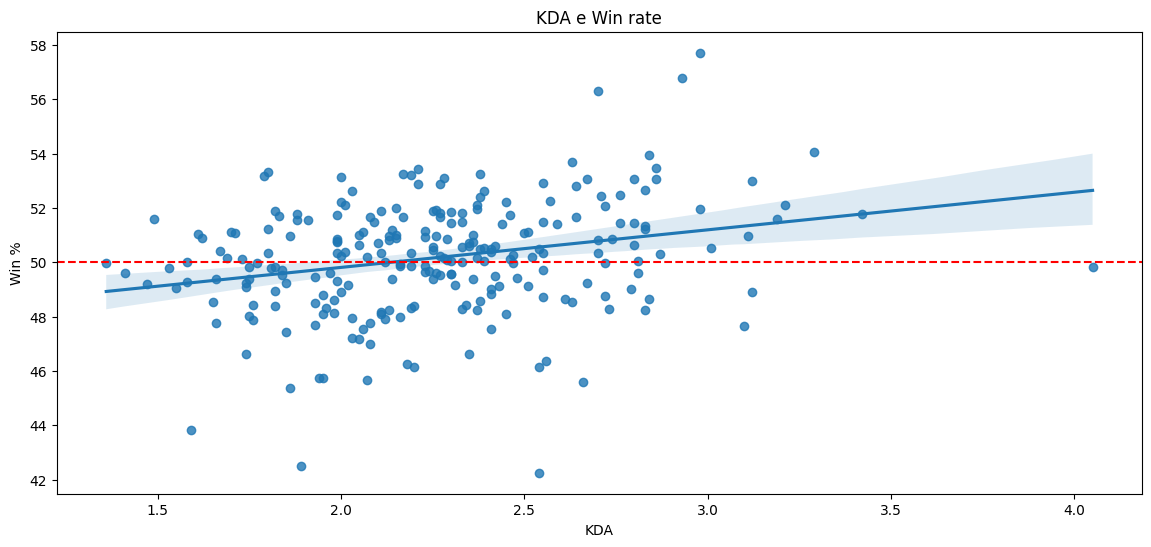

In [18]:
plt.figure(figsize=(14,6))
graph = sns.regplot(x='KDA', y='Win %', data=og_data)
graph.axhline(50, color='red', ls='--')
plt.title('KDA e Win rate')
plt.show()

Visualizacao do relacionamento entre Pick Rate % e Win Rate %

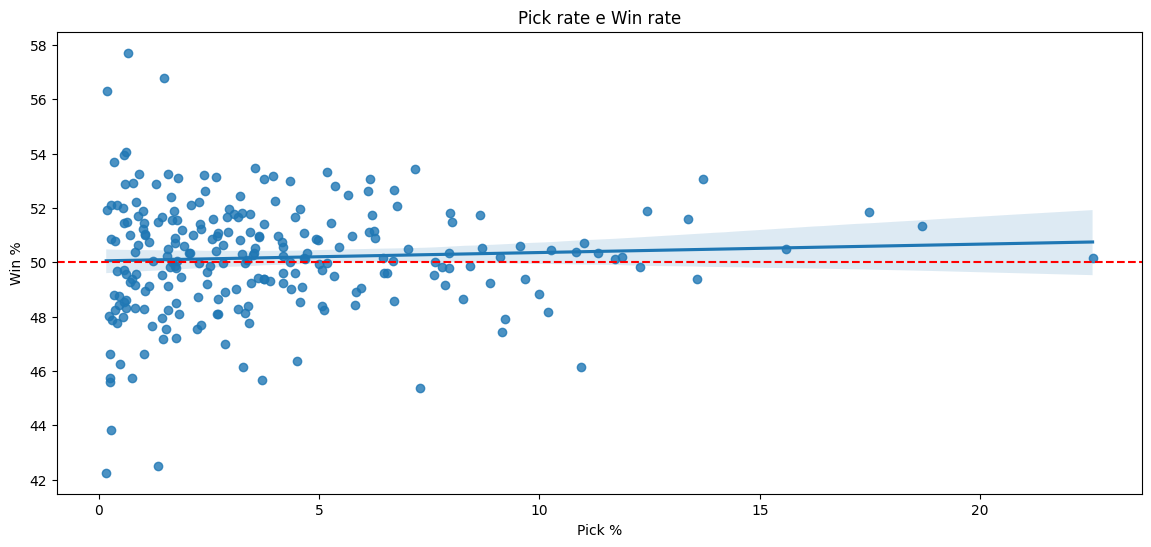

In [19]:
plt.figure(figsize=(14,6))
graph = sns.regplot(x='Pick %',y='Win %', data=og_data)
graph.axhline(50, color='red',ls='--')
plt.title('Pick rate e Win rate')
plt.show()

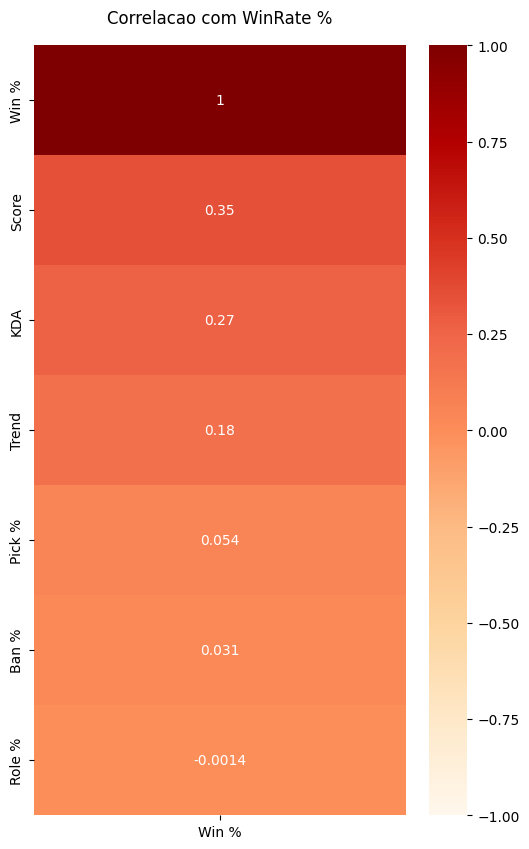

In [20]:
plt.figure(figsize=(6, 10))
df = og_data.select_dtypes(include=np.number)
corr_matrix = df.corr()

sns.heatmap(corr_matrix[['Win %']].sort_values(by='Win %', ascending=False), vmin=-1, vmax=1, annot=True, cmap='OrRd')
plt.title('Correlacao com WinRate %', pad =16)
plt.show()